In [65]:
import fastai
from fastbook import *
from fastai.vision.widgets import *

In [7]:
butterfly_types = 'monarch', 'cabbage white', 'tiger swallowtail'
path = Path('butterflies')

In [37]:
for b in butterfly_types:
    dest = (path/b)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{b} butterfly', max_images=150)
    download_images(dest, urls=results)

In [38]:
fns = get_image_files(path)
fns

(#537) [Path('butterflies/cabbage white/00000000.jpg'),Path('butterflies/cabbage white/00000001.jpg'),Path('butterflies/cabbage white/00000002.jpg'),Path('butterflies/cabbage white/00000003.JPG'),Path('butterflies/cabbage white/00000004.jpg'),Path('butterflies/cabbage white/00000005.jpg'),Path('butterflies/cabbage white/00000006.jpg'),Path('butterflies/cabbage white/00000007.jpg'),Path('butterflies/cabbage white/00000008.jpg'),Path('butterflies/cabbage white/00000009.jpg')...]

In [39]:
failed = verify_images(fns)

In [40]:
failed

(#0) []

In [41]:
butterflies = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [42]:
dls = butterflies.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


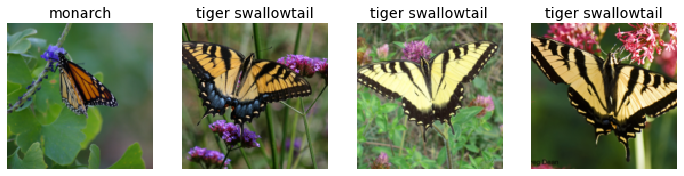

In [43]:
dls.valid.show_batch(max_n=4, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


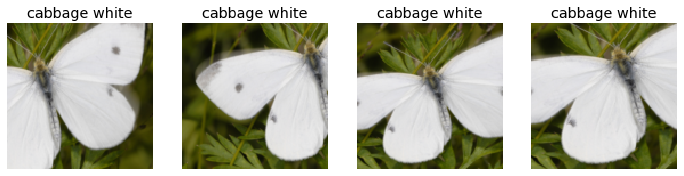

In [44]:
butterflies = butterflies.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = butterflies.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


c:\users\admin\appdata\local\programs\python\python38\lib\site-packages\torch\_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


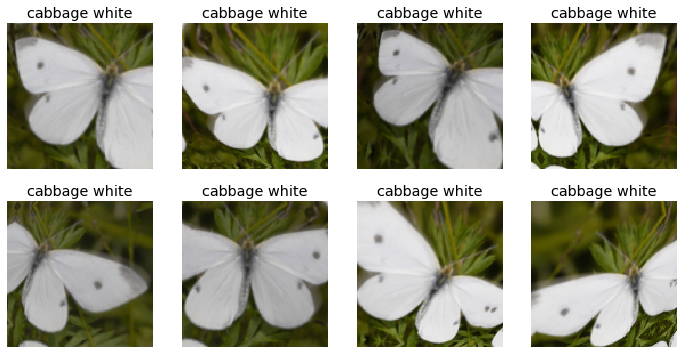

In [45]:
butterflies = butterflies.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = butterflies.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [46]:
butterflies = butterflies.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
                             batch_tfms=aug_transforms())
dls = butterflies.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [47]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\Admin/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.255206,0.050273,0.009346,00:31


epoch,train_loss,valid_loss,error_rate,time
0,0.182348,0.030582,0.009346,00:38
1,0.118780,0.045759,0.009346,00:37
2,0.085937,0.053423,0.009346,00:37
3,0.065377,0.057319,0.009346,00:37


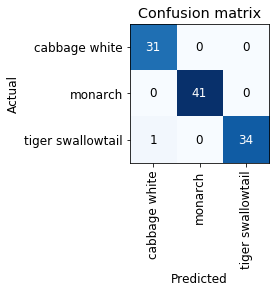

In [49]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [52]:
learn.export()

In [53]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [54]:
learn_inf = load_learner(path/'export.pkl')

In [55]:
learn_inf.predict('images/canadian-tiger-swallowtail.jpg')

('tiger swallowtail',
 TensorBase(2),
 TensorBase([9.3709e-05, 1.4123e-04, 9.9977e-01]))

In [66]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [74]:
out_pl = widgets.Output()
lbl_pred = widgets.Label()

In [75]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
    
btn_run.on_click(on_click_classify)

In [76]:
btn_upload = widgets.FileUpload()

In [77]:
VBox([widgets.Label('Select your butterfly!'),
     btn_upload, btn_run, out_pl, lbl_pred])